### IMPORT ALL THE NECESSARY PACKAGES AND LIBRARIES

In [8]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

### LOAD THE DATASET 

In [12]:

file_path = r"C:\Users\bpmog\anaconda_projects\AB Testing Model\2017_Yellow_Taxi_Trip_Data.csv"
df = pd.read_csv(file_path)

In [13]:
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


### DATA CLEANING

In [27]:
# Filter to include only payment types 1 (credit card) and 2 (cash)
df_filtering = df[df["payment_type"].isin([1, 2])]

# Remove any entries with zero or negative fare amount
df_filtering = df_filtering[df_filtering["fare_amount"] > 0]

# Separate groups 
credit_card = df_filtering[df_filtering["payment_type"] == 1]["fare_amount"]
cash = df_filtering[df_filtering["payment_type"] == 2]["fare_amount"]

df_filtering.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


### PEFORM STATISTICAL TESTING:

In [18]:
# Compute descriptive statistics
print("Descriptive Statistics:")
print(f"Credit card - Mean: {credit_card.mean():.2f}, Std: {credit_card.std():.2f}, N: {len(credit_card)}")
print(f"Cash - Mean: {cash.mean():.2f}, Std: {cash.std():.2f}, N: {len(cash)}")

Descriptive Statistics:
Credit card - Mean: 13.43, Std: 13.85, N: 15262
Cash - Mean: 12.22, Std: 11.69, N: 7266


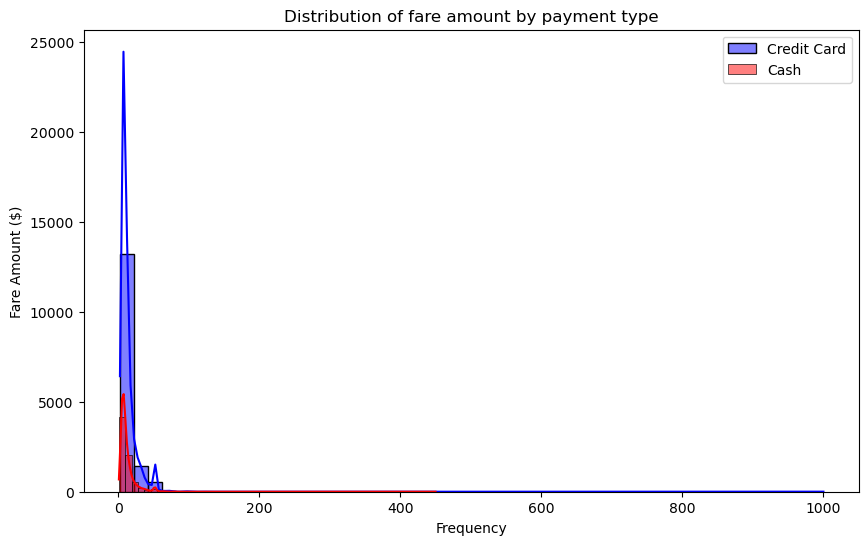

In [21]:
#Visualize the distribution
plt.figure(figsize=(10,6))
sns.histplot(credit_card, bins=50, color="blue", label="Credit Card", kde=True)
sns.histplot(cash, bins=50, color="red", label="Cash", kde=True)
plt.legend()
plt.title("Distribution of fare amount by payment type")
plt.ylabel("Fare Amount ($)")
plt.xlabel("Frequency")
plt.show()

In [24]:
# Perform two sample t-test (independent)
t_stat, p_val = stats.ttest_ind(a = credit_card, b = cash, equal_var=False)

print("Hypothesis Test Results")
print(f"T-Statistics: {t_stat:.4f}")
print(f"P_value: {p_val:.4f}")

Hypothesis Test Results
T-Statistics: 6.8717
P_value: 0.0000


### INTEPRETATION OF THE HYPOTHESIS

In [26]:
alpha = 0.05
if p_val < alpha:
    print("Conclusion: Reject the null hypothesis - Credit card fare are significantly different from cash fares.")
else:
    print("Conclusion: Fail to reject the null hypothesis - No significant difference in fare amount between credit and cash.")

Conclusion: Reject the null hypothesis - Credit card fare are significantly different from cash fares.
